In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import shap

#from google.colab import files

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import  GridSearchCV,ParameterGrid,train_test_split

from sklearn.linear_model import LinearRegression , ElasticNet,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor

from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.decomposition import PCA

# Import eigh method for calculating eigenvalues and eigenvectirs
from numpy.linalg import eigh

from yellowbrick.model_selection import RFECV
from sklearn.inspection import permutation_importance

In [ ]:
pip install shap

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


***Regression Models***

In [14]:
#split and scale data
def split_and_scale_data(x, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

##CV=5:

#lR
def Linear_regression_model(X_train, y_train, X_test, y_test):
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_train_pred = regression_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    evaluation_metrics = {'R-squared Score (Test Set)': r2,
        'R-squared Score (Train Set)': r2_train,
        #'Mean Absolute Error': mae,
        #'Mean Squared Error': mse,
        'RMSE': rmse}
    return evaluation_metrics

#elasticnet
def elastic_net(X_train, y_train, X_test, y_test):
    elastic_net = ElasticNet()
    param_grid = {
        'alpha': [0.1, 0.5, 1.0],
        'l1_ratio': [0.2, 0.5, 0.8] }
    grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_alpha = grid_search.best_params_['alpha']
    best_l1_ratio = grid_search.best_params_['l1_ratio']

    model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)

    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    evaluation_metrics = {'R-squared Score (Test Set)': r2_test,
        'R-squared Score (Train Set)': r2_train,
      #  "Best Hyperparameters": grid_search.best_params_,
       # 'Mean Absolute Error': mae,
        #'Mean Squared Error': mse,
        'RMSE': rmse}
    return evaluation_metrics

#svm_regression
def svm_regression(X_train, y_train, X_test, y_test):
    model = SVR()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    evaluation_metrics = {'R-squared Score (Test Set)': r2_test,
                          'R-squared Score (Train Set)': r2_train,
        #'Mean Absolute Error': mae,
        #'Mean Squared Error (Test Set)': mse_test,
        'RMSE (Test Set)': rmse,
        #'Mean Squared Error (Train Set)': mse_train
    }
    return evaluation_metrics

#knn regression
def knn_regression(X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2,3,4,5,6,7,10],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
                  #,'metric':['Euclidean', 'Minkowski',  'Manhattan']}
    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(np.ravel(y_test), y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(np.ravel(y_test), y_pred)
    r2 = r2_score(np.ravel(y_test), y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {
        'R-squared Score (Test)': r2,
        'R-squared Score (Train)': r2_train,
        #"Best Hyperparameters": grid_search.best_params_,

        #'Mean Absolute Error': mae,
        #'Mean Squared Error': mse,
        'RMSE': rmse
    }
    return evaluation_metrics


#RF
def random_forest_regression(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {
        'R-squared Score ( Test)': r2,
        'R-squared Score (Train)': r2_train,
        #"Best Hyperparameters": grid_search.best_params_,
        #'Mean Absolute Error': mae,
        #'Mean Squared Error': mse,
        'RMSE': rmse
        }
    return evaluation_metrics

#dt
def decision_tree_regression(X_train, y_train, X_test, y_test):
    param_grid = {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    model = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5 )  #, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {'R-squared Score ( Test)': r2,
        'R-squared Score (Train)': r2_train,
        "Best Hyperparameters": grid_search.best_params_,
        'Mean Absolute Error': mae,
       'Mean Squared Error': mse,
        'RMSE': rmse
    }
    return evaluation_metrics

#gbr
def gradient_boosting_regression(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {'R-squared Score ( Test)': r2,
        'R-squared Score (Train)': r2_train,
        #"Best Hyperparameters": grid_search.best_params_,
        #'Mean Absolute Error': mae,
       # 'Mean Squared Error': mse,
        'RMSE': rmse
    }

    return evaluation_metrics

#ridge
def ridge_regression(X_train, y_train, X_test, y_test):

    param_grid = {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'tol': [0.0001, 0.001, 0.01]
    }

    model = Ridge(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    #r2_train = best_model.score(X_train, y_train)
    evaluation_metrics = {'R-squared Score ( Test)': r2,
        'R-squared Score (Train)': r2_train,
        #"Best Hyperparameters": grid_search.best_params_,
        #'Mean Absolute Error': mae,
       # 'Mean Squared Error': mse,
        'RMSE': rmse
    }
    return evaluation_metrics

#lasso
def lasso_regression(X_train, y_train, X_test, y_test):
    param_grid = {
        'alpha': [0.1, 1.0, 10.0],
        'tol': [0.0001, 0.001, 0.01]
    }
    model = Lasso(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {
        'R-squared Score (Test)': r2,
        'R-squared Score (Train)': r2_train,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse
    }
    return evaluation_metrics

In [ ]:
##CV=off

def gb(X_train, y_train, X_test, y_test):
    hyperparameters = {
        'learning_rate': [0.1, 0.01, 0.001],
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 7]
    }

    model = GradientBoostingRegressor()

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model.set_params(**params)
        model.fit(X_train, np.ravel(y_train))

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results


def KNN(X_train, y_train, X_test, y_test):

    #hyperparameters
    hyperparameters = {'n_neighbors': [3, 5, 7, 9],
                      'weights': ['uniform', 'distance'],
                      'p': [1, 2],
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model = KNeighborsRegressor()
        model.set_params(**params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results


def RF(X_train, y_train, X_test, y_test):

    #hyperparameters
    hyperparameters = { 'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
                           }

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model = RandomForestRegressor()
        model.set_params(**params)
        model.fit(X_train, np.ravel(y_train))

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results


def DT(X_train, y_train, X_test, y_test):

    #hyperparameters
    hyperparameters = {
    'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
                           }

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model = DecisionTreeRegressor()
        model.set_params(**params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results




#print('KNN',KNN(X_train, y_train, X_test, y_test))
#print('GBR',gb(X_train, y_train, X_test, y_test))
#print('RF',RF(X_train, y_train, X_test, y_test))
#print('DT',DT(X_train, y_train, X_test, y_test))

#datasets

In [10]:
#Encoding method 1
df=pd.read_excel('data.xlsx', sheet_name='Sheet6')
df=df.drop('Isc',axis=1)


In [11]:
#Encoding method 2 (OHE)
df1=pd.read_excel('data.xlsx', sheet_name='sheet1')

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df1[['DROP']])
feature_names = [f'{col}_{value}' for col, values in zip(df1[['DROP']], encoder.categories_) for value in values]
df_encoded= pd.DataFrame(encoded_data, columns=feature_names)
df1 = pd.concat([df1, df_encoded], axis=1)
df1=df1.drop(['DROP','Isc'],axis=1)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


#Regression result

df

cv=5

In [12]:
x=df.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df[['FF']]

In [15]:
X_train, X_test, y_train, y_test = split_and_scale_data(x, y, test_size=0.2, random_state=78)

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, np.ravel(y_train))
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_train = best_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

# Get feature importances
feature_importances = best_model.feature_importances_
feature_names = x.columns

# Permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test)

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Sort permutation importance by feature importance
sorted_indices = importance_df.index.values
perm_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': perm_importance['importances_mean']})
perm_importance_df = perm_importance_df.reindex(sorted_indices)

evaluation_metrics = {
    'R-squared Score (Test)': r2,
    'R-squared Score (Train)': r2_train,
    'Best Hyperparameters': grid_search.best_params_,
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'RMSE': rmse
}

print("Feature Importance:")
print(importance_df)
print("\nPermutation Importance:")
print(perm_importance_df)
print("\nEvaluation Metrics:")
print(pd.Series(evaluation_metrics))

Feature Importance:
                        Feature  Importance
0                          DROP    0.413553
30      PL_peak_positions_peak2    0.100727
22         relative_intensity 4    0.079081
18                  Intensity 6    0.057069
24         relative_intensity 6    0.042340
16                  Intensity 4    0.040556
25           PL_amplitude_peak1    0.025392
11                    2-theta 5    0.023097
13                  Intensity 1    0.018925
12                    2-theta 6    0.015939
6                        FWHM 6    0.014925
4                        FWHM 4    0.013127
8                     2-theta 2    0.012706
20         relative_intensity 2    0.012122
9                     2-theta 3    0.012070
14                  Intensity 2    0.010615
27                PL_fwhm_peak1    0.009879
26           PL_amplitude_peak2    0.009832
1                        FWHM 1    0.009111
32  PL_relative_amplitude_peak2    0.009054
23         relative_intensity 5    0.006627
17          

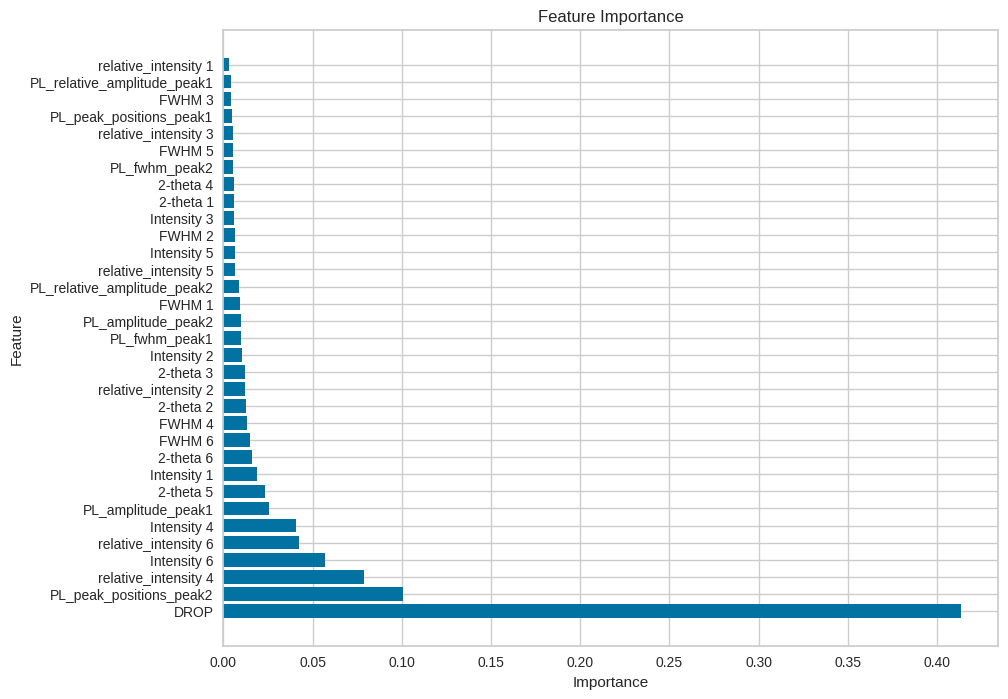

In [20]:
feature_importances = importance_df['Importance'].values
feature_names = importance_df['Feature'].values
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


SHAP Values:


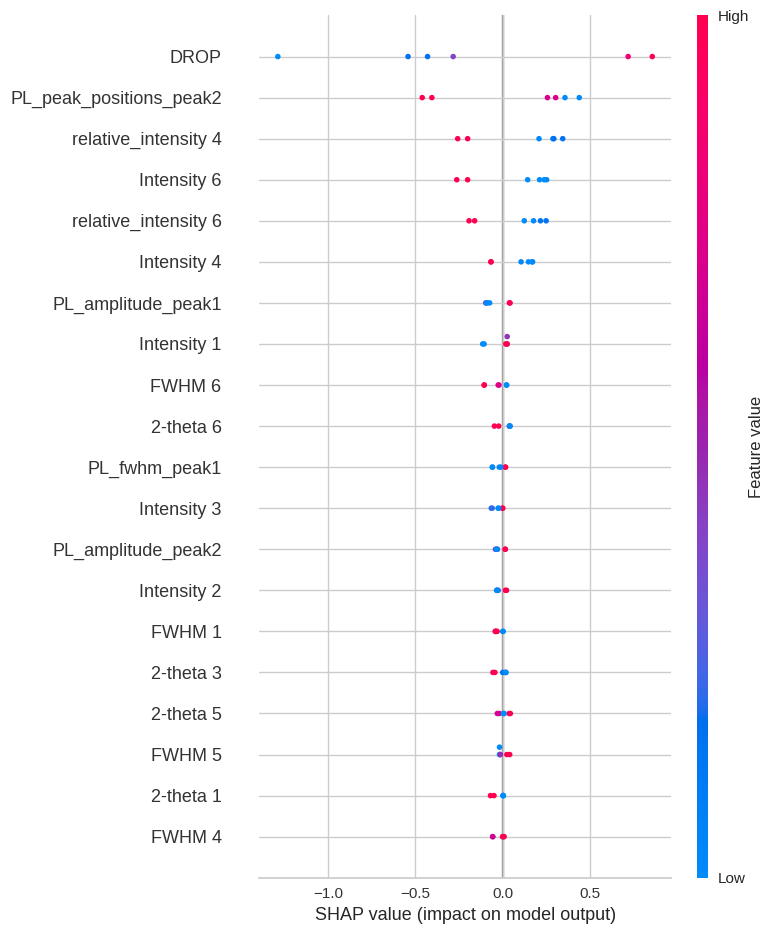

In [18]:
# Calculate SHAP values
shap.initjs()

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)


feature_names = x.columns.tolist()
print("\nSHAP Values:")
shap.summary_plot(shap_values, X_test, feature_names=feature_names)